In [22]:
import cv2
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

import lib.utils as utils
import lib.bovw as bovw

In [2]:
train_imgs, train_labels = utils.load_train_images_cv_grayscale()
print(len(train_imgs))

3500


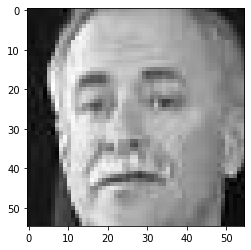

In [3]:
plt.imshow(train_imgs[0], cmap="gray")

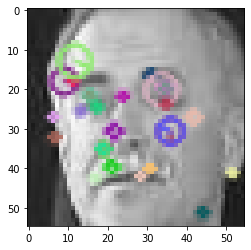

In [4]:
sift = cv2.SIFT_create()
key_points, descriptors = bovw.compute_keypoints_and_descriptors(sift, train_imgs[0])
bovw.plot_keypoints(key_points, train_imgs[0])

In [5]:
bag_of_visual_words = bovw.BOVWFeatures(dim=4000)

In [6]:
train_features = bag_of_visual_words.fit_and_get_histograms(train_imgs)
print(train_features.shape)

Performing K-Means
Computing histograms
(3500, 4000)


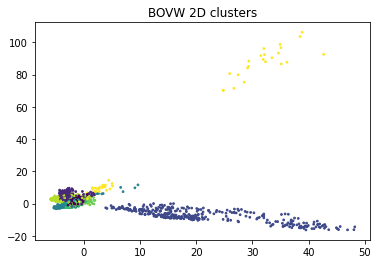

In [24]:
pca_2 = PCA(n_components=2)
pca_2.fit(train_features)
train_features_2d = pca_2.transform(train_features)

plt.scatter(train_features_2d[:, 0], train_features_2d[:, 1], s=3, c=train_labels, cmap="viridis")
plt.title("BOVW 2D clusters")
plt.show()

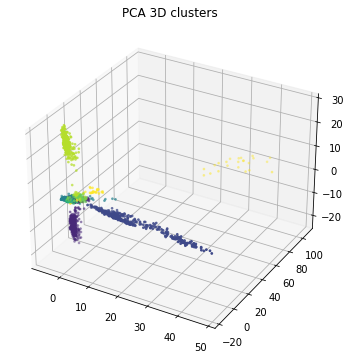

In [25]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(projection='3d')

pca_3 = PCA(n_components=3)
pca_3.fit(train_features)
train_features_3d = pca_3.transform(train_features)

ax.scatter(train_features_3d[:, 0], train_features_3d[:, 1], train_features_3d[:, 2], s=3, c=train_labels, cmap="viridis")
plt.title("PCA 3D clusters")
plt.show()

In [26]:
test_imgs, train_labels = utils.load_test_images_cv_grayscale()
print(len(test_imgs))

1500


In [27]:
test_features = bag_of_visual_words.get_histograms(test_imgs)
print(test_features.shape)

(1500, 4000)
